
---


# **Basic Overview of Dataset**



---

The dataset comprises 769 instances of female patients from the Pima Indian heritage, aged 21 and above, aimed at predicting diabetes probability. It includes eight variables: Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, and Age. The goal is to provide a binary answer indicating the likelihood of diabetes based on these variables. The dataset is sourced from Kaggle and focuses on a specific demographic for targeted analysis.And the features of dataset like columns contains numerical values.




---


**LINK TO DATASET:https://www.kaggle.com/datasets/kandij/diabetes-dataset/data**


---



In [79]:
#Libararies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



---




# **Missing Values**

---






In [80]:
#Checking weather there are any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB



---




# **Loading Dataset**

---


In [81]:
data=pd.read_csv("diabetes2.csv")
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [82]:
#Columns in our dataset
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')



---
# **Dimensionaility**


---





In [83]:
#(Number of rows,Number of Columns)
data.shape

(768, 9)


---


#**ANOMALIES IN DATASET**



---
As in the dataset column Glucose ,BloodPressure, SkinThickness	,Insulin and BMI ,there were some values that were 0 which is not possible. So i will replace them with the mean value of the coulmn in order to have a clean dataset. As can be seen by the data.describe() above.

In [84]:
#Dataset Cleaning
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000


---


#**Numerical Features**



---


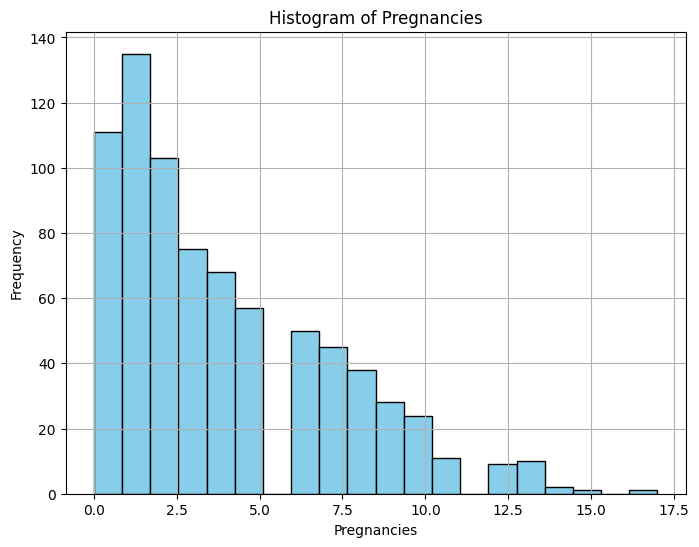

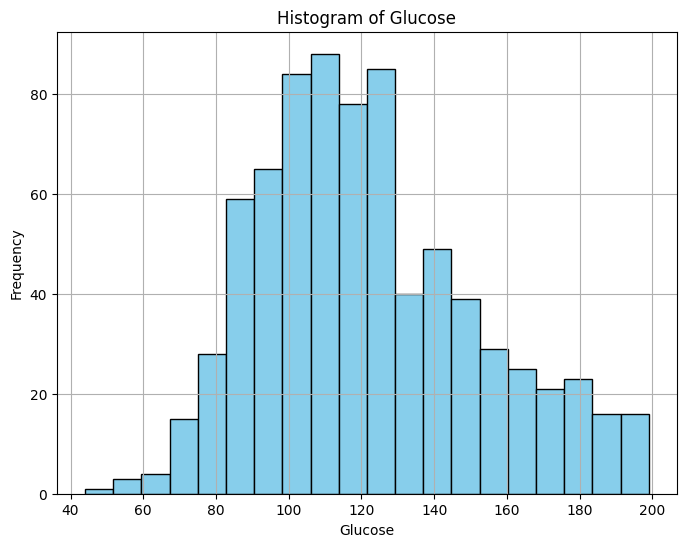

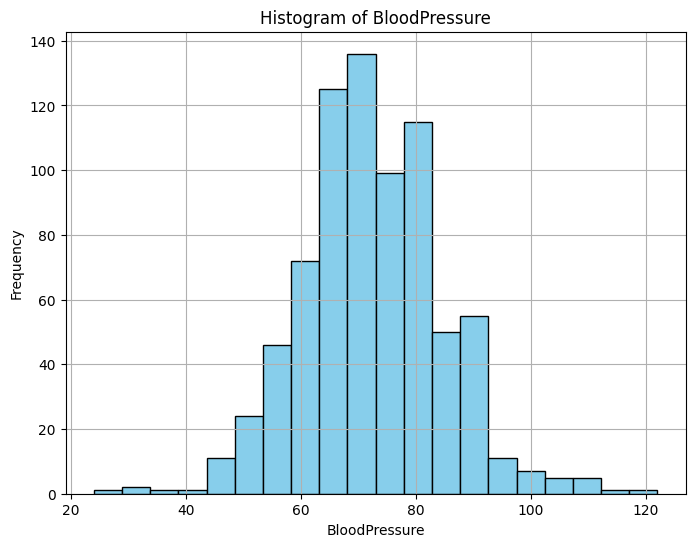

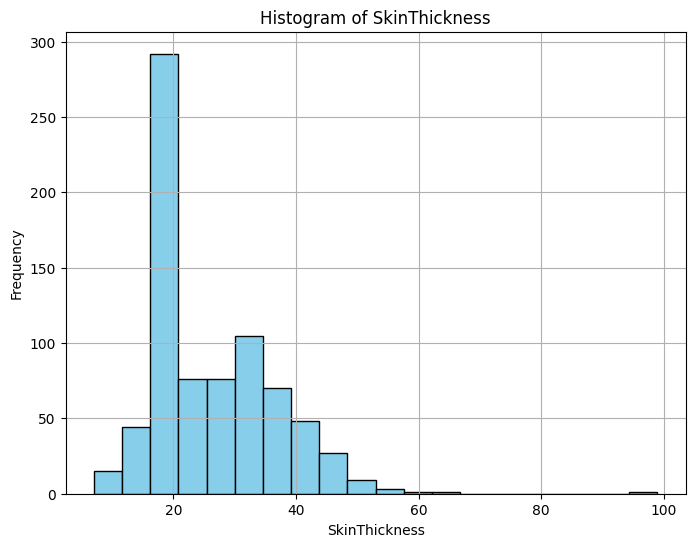

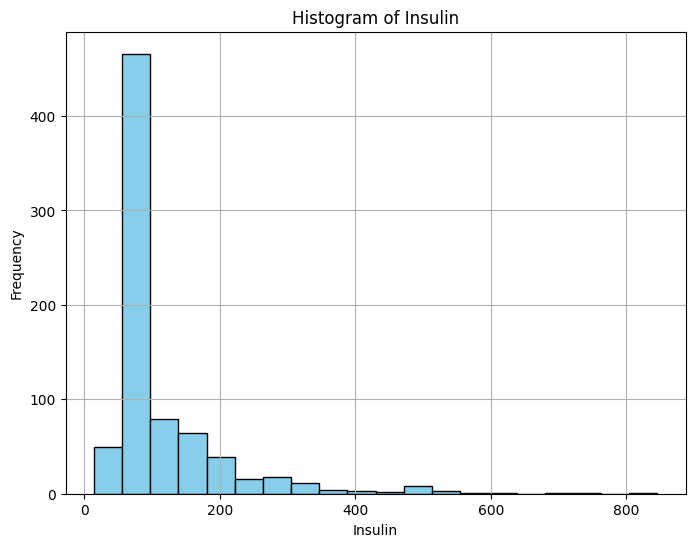

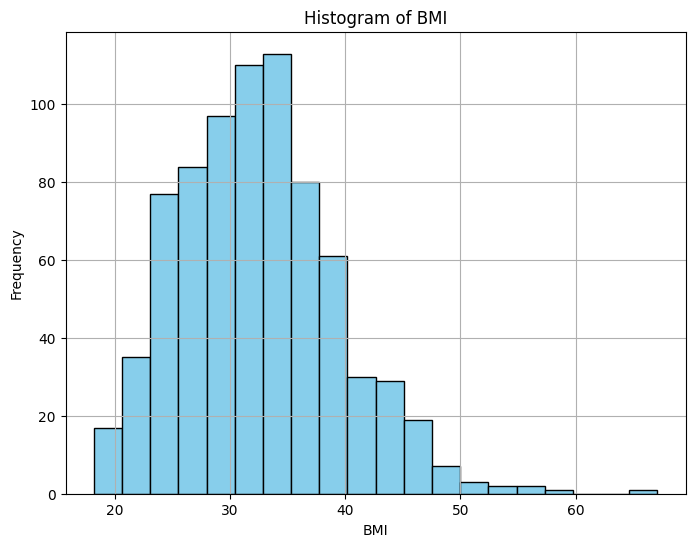

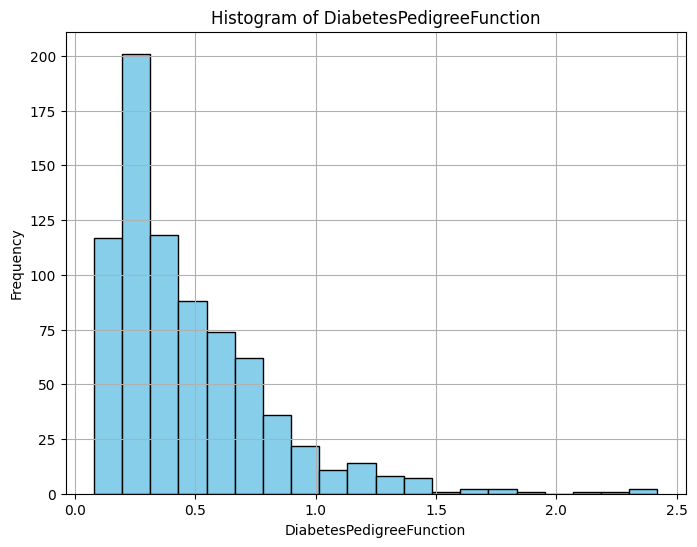

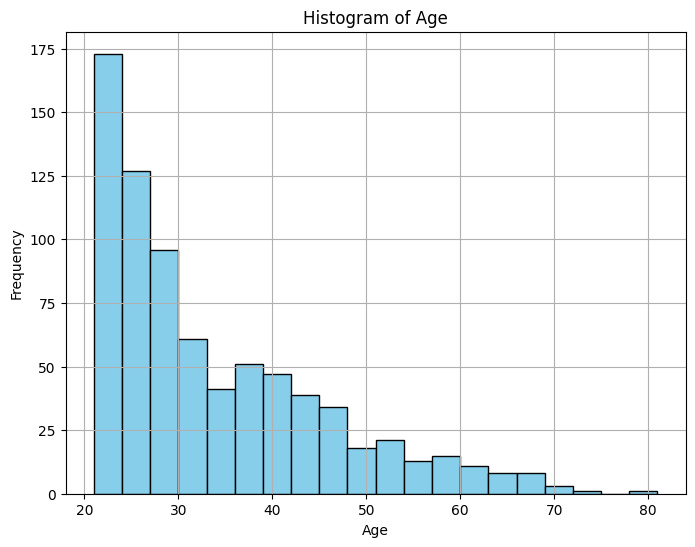

In [85]:
for column in data.columns[:-1]:
    plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)  # Add grid lines for better readability
    plt.show()


---


#**Removing Outliers**



---


It is clear from the above histograms, that there are outliers present in the data and skews too.

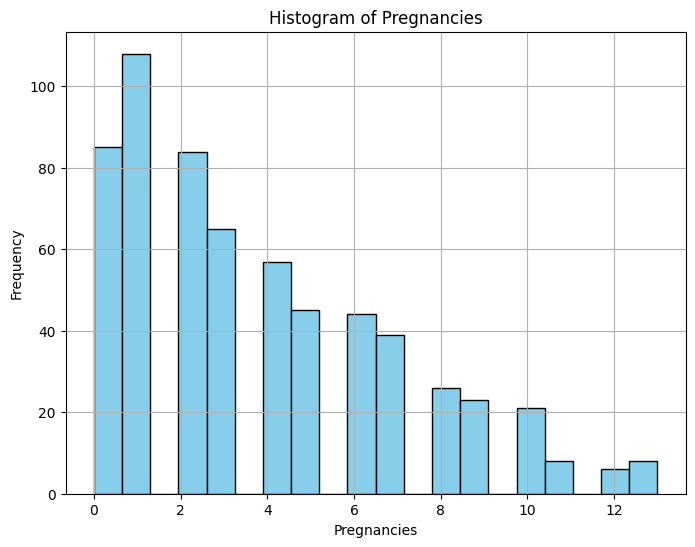

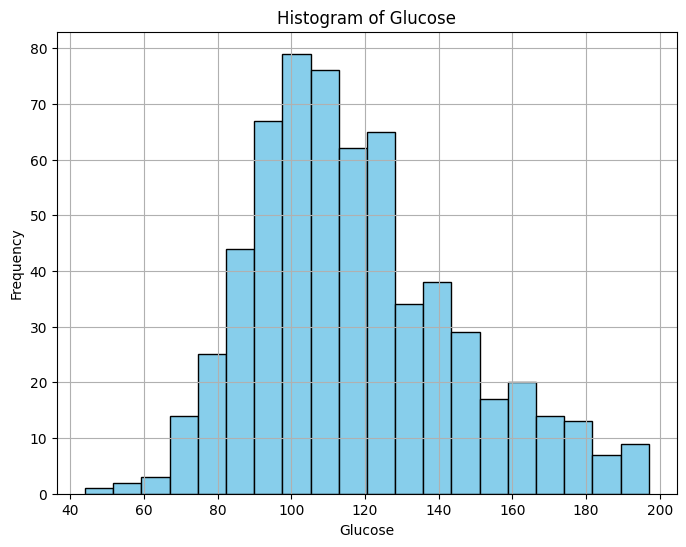

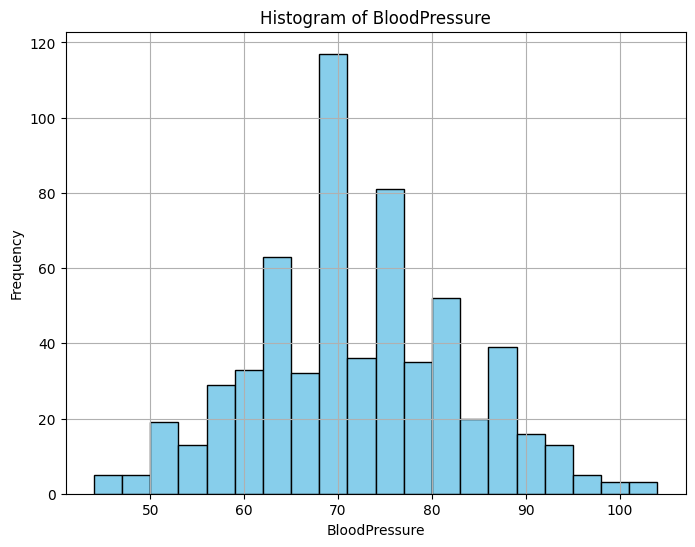

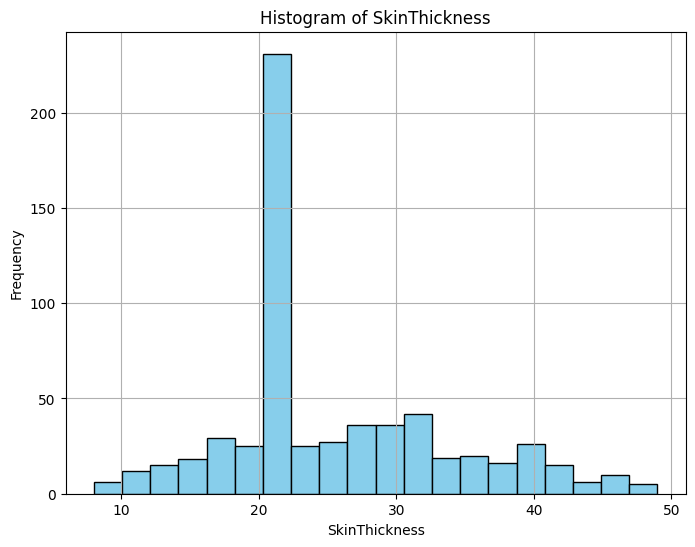

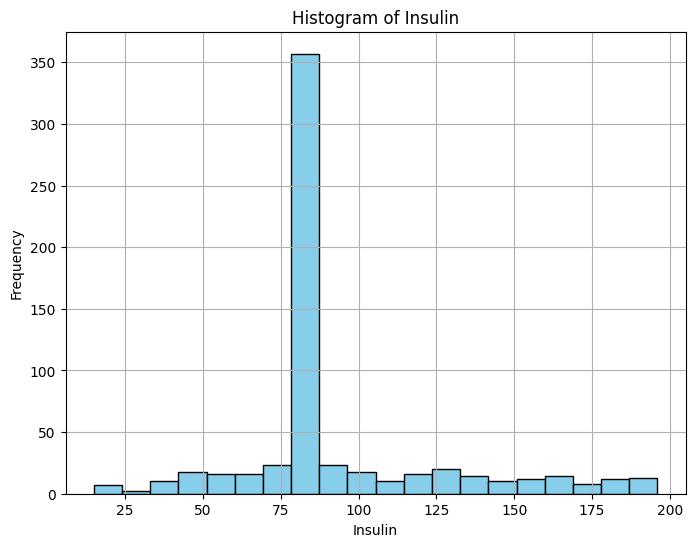

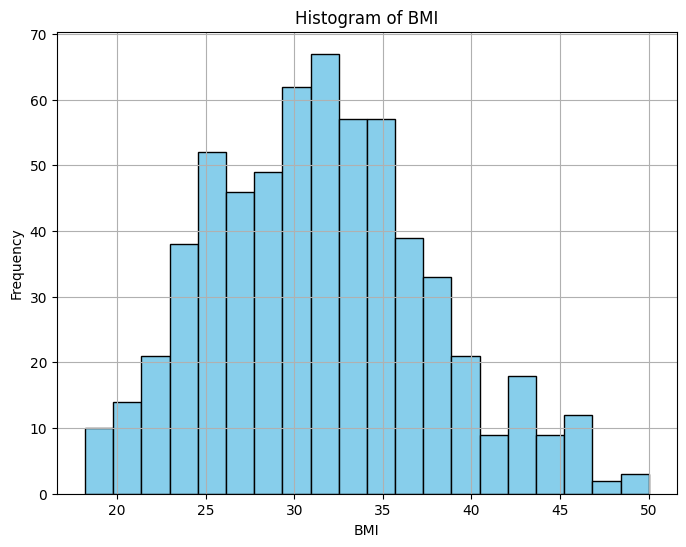

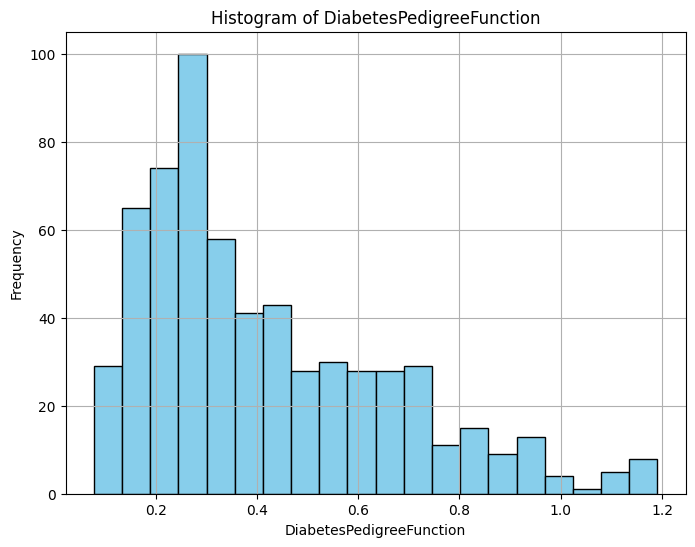

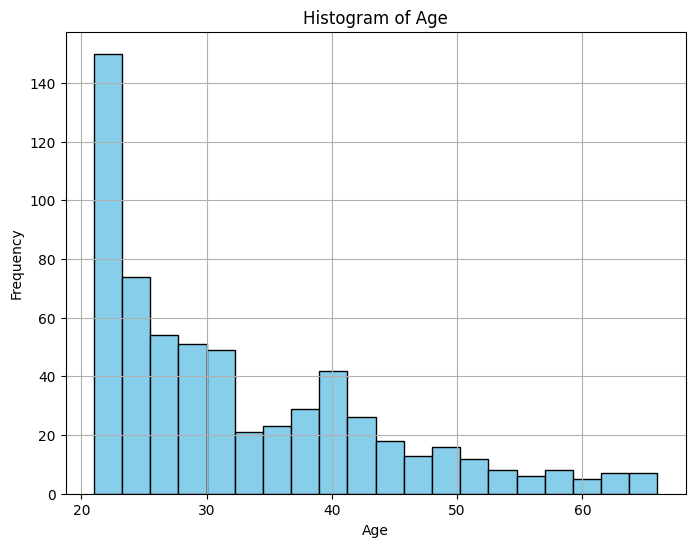

In [86]:
# #Removing Outliers
def remove_outliers(df, columns, threshold=1.5):
    df_cleaned = df.copy()
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
df=remove_outliers(data,cols)

#plotting for updated df
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)  # Add grid lines for better readability
    plt.show()



---


#**Categorical Features:BAR CHARTS**



---



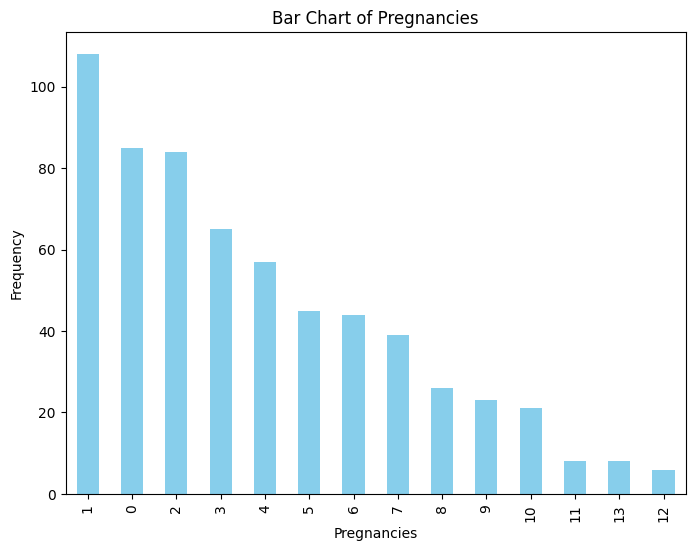

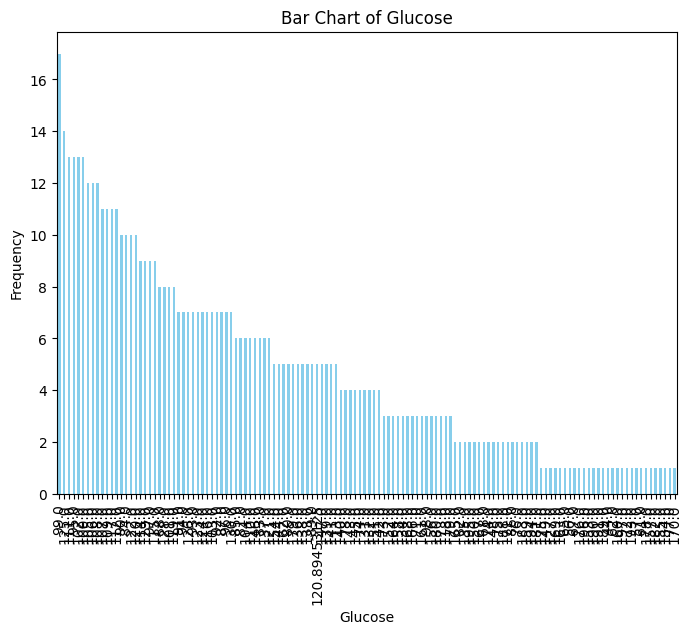

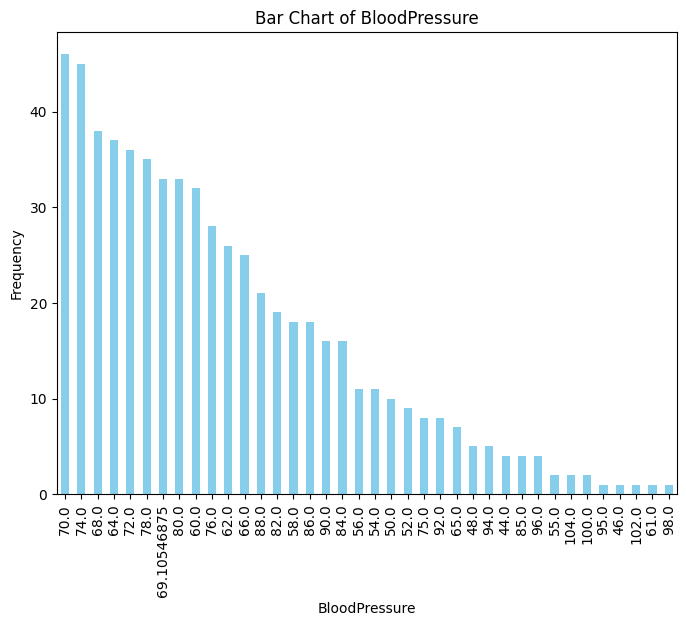

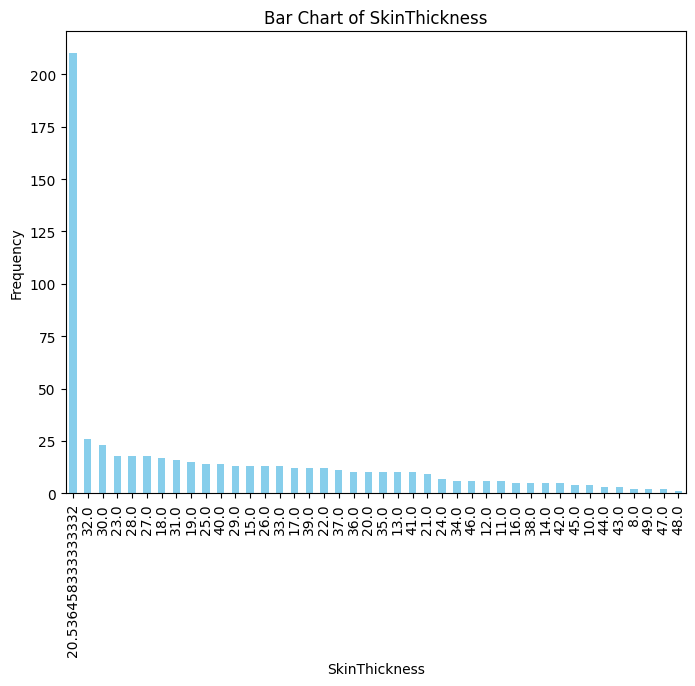

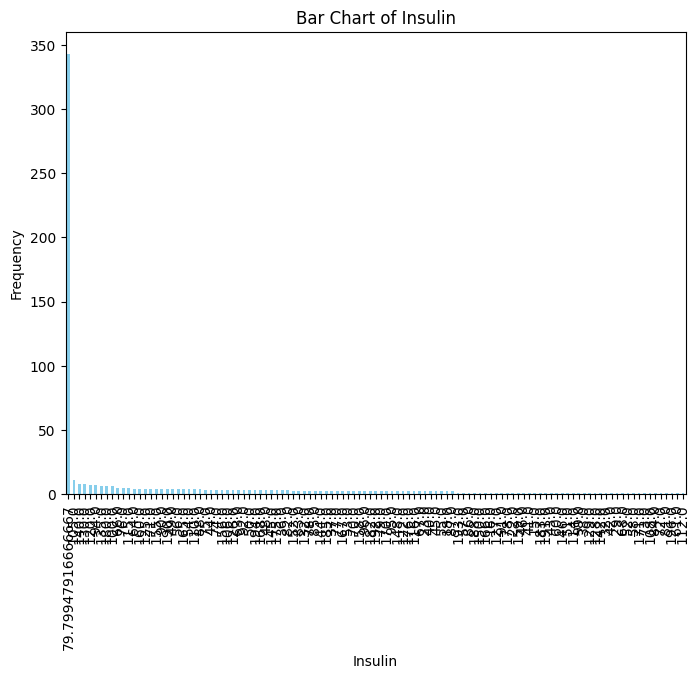

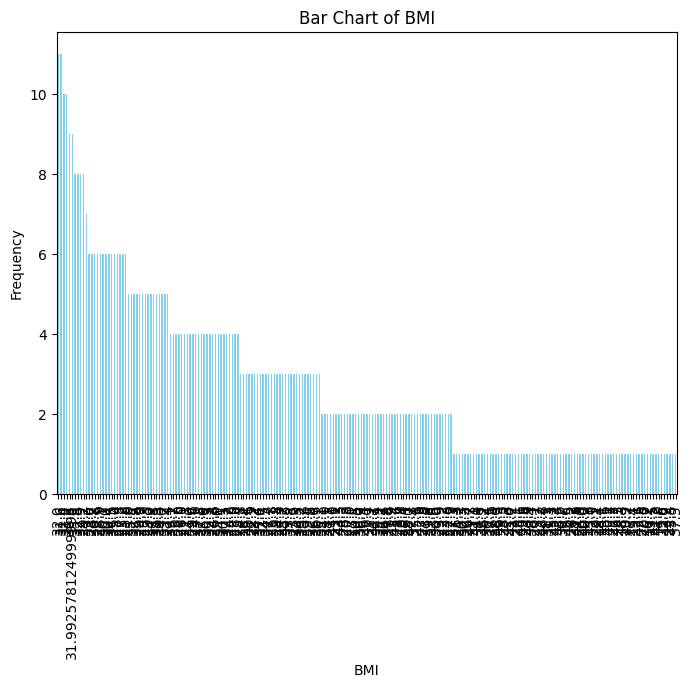

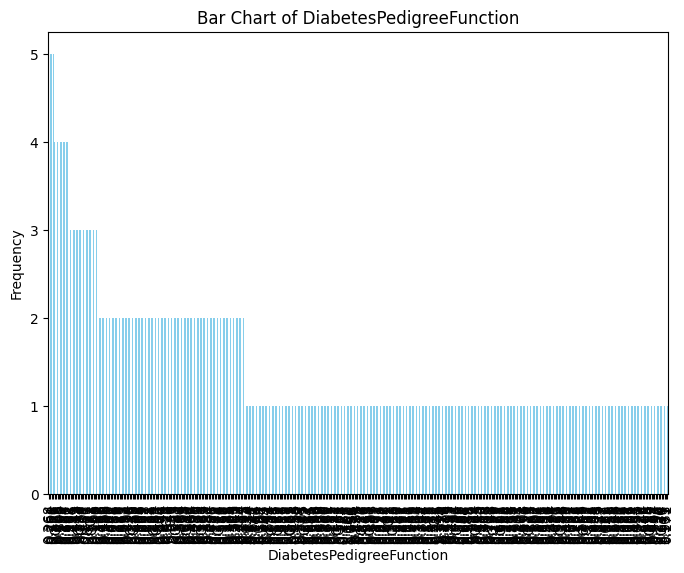

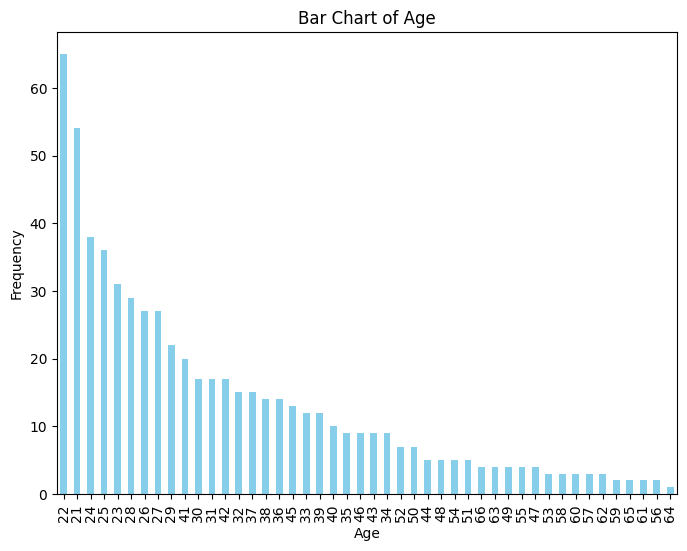

In [87]:
#Plotting Barcharts
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Bar Chart of {column}')
    plt.show()


---


#**Categorical Features:PIE CHARTS**



---


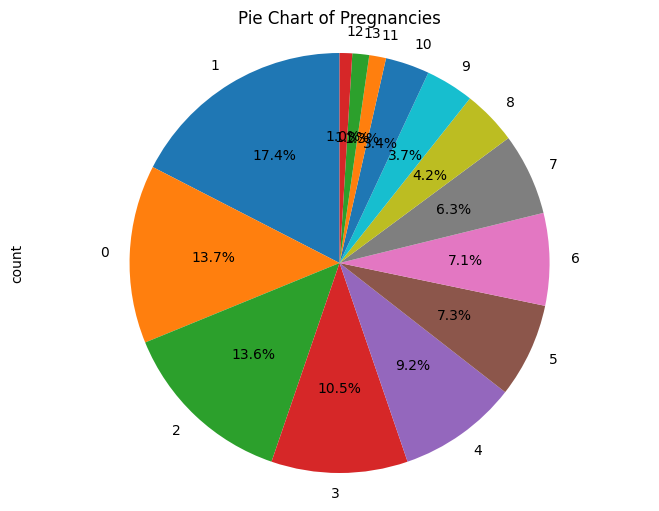

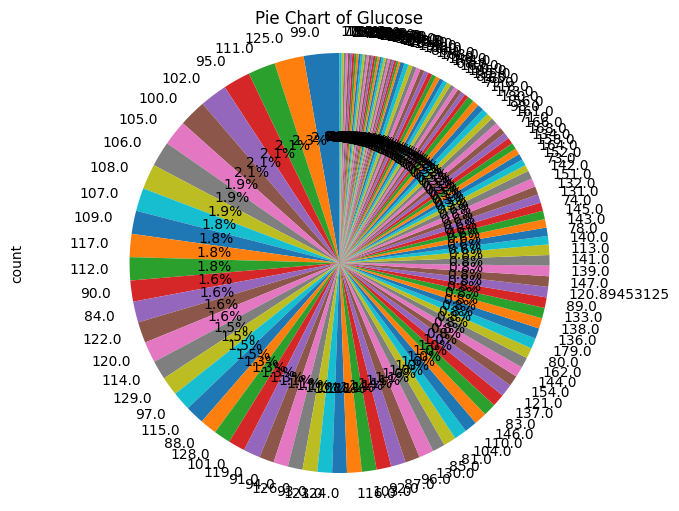

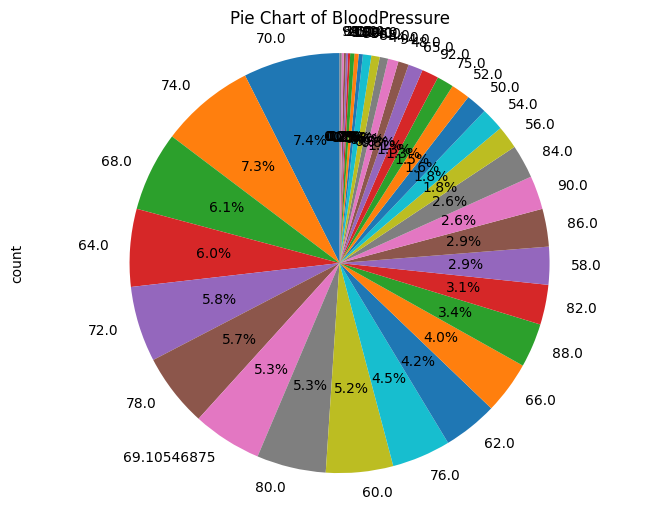

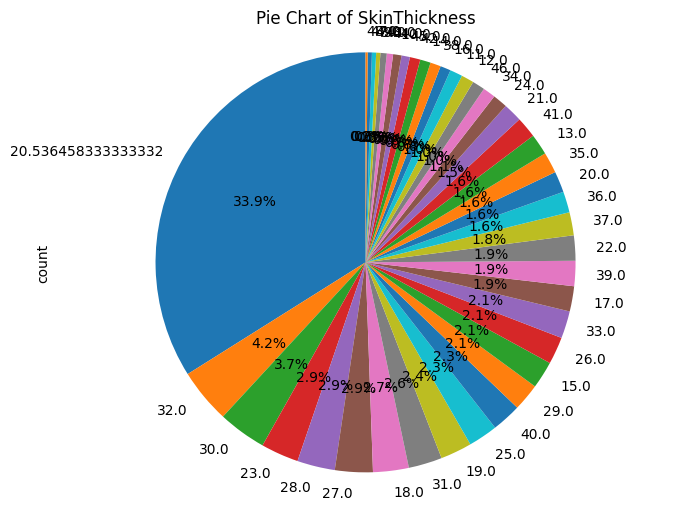

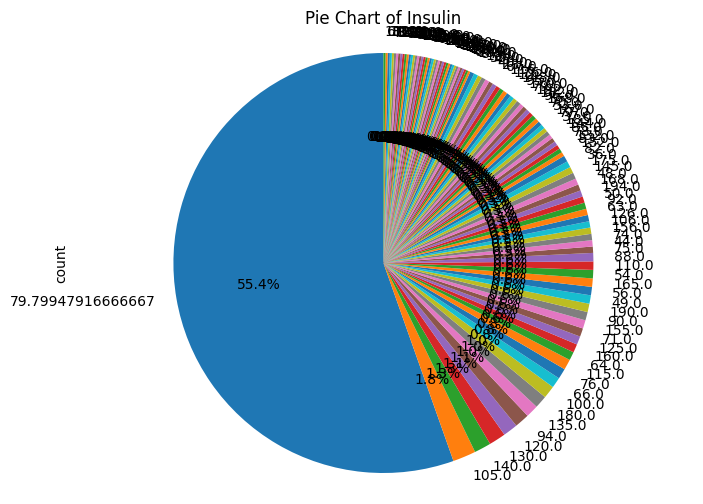

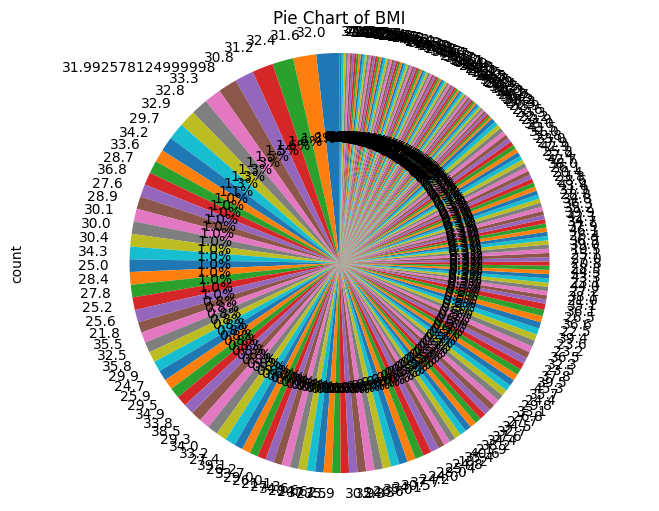

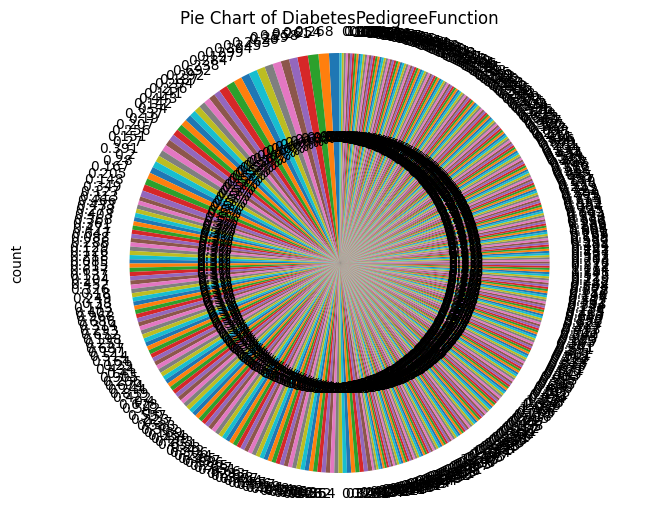

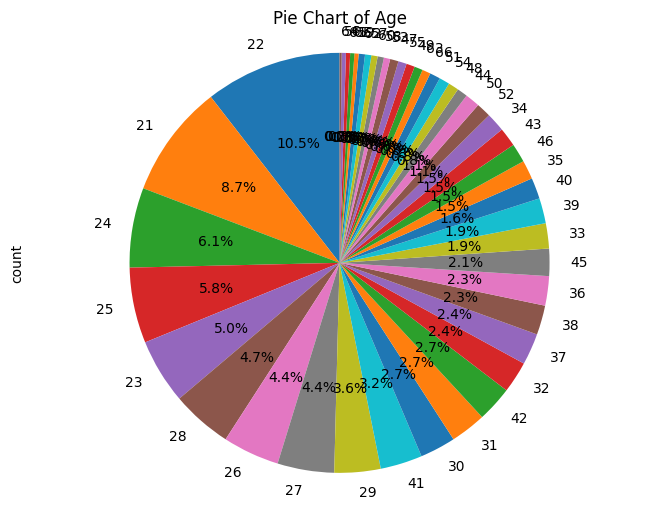

In [88]:
# Alternatively, plot pie charts for each categorical feature
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(f'Pie Chart of {column}')
    plt.show()



---
#**PLOT PAIRS**


---





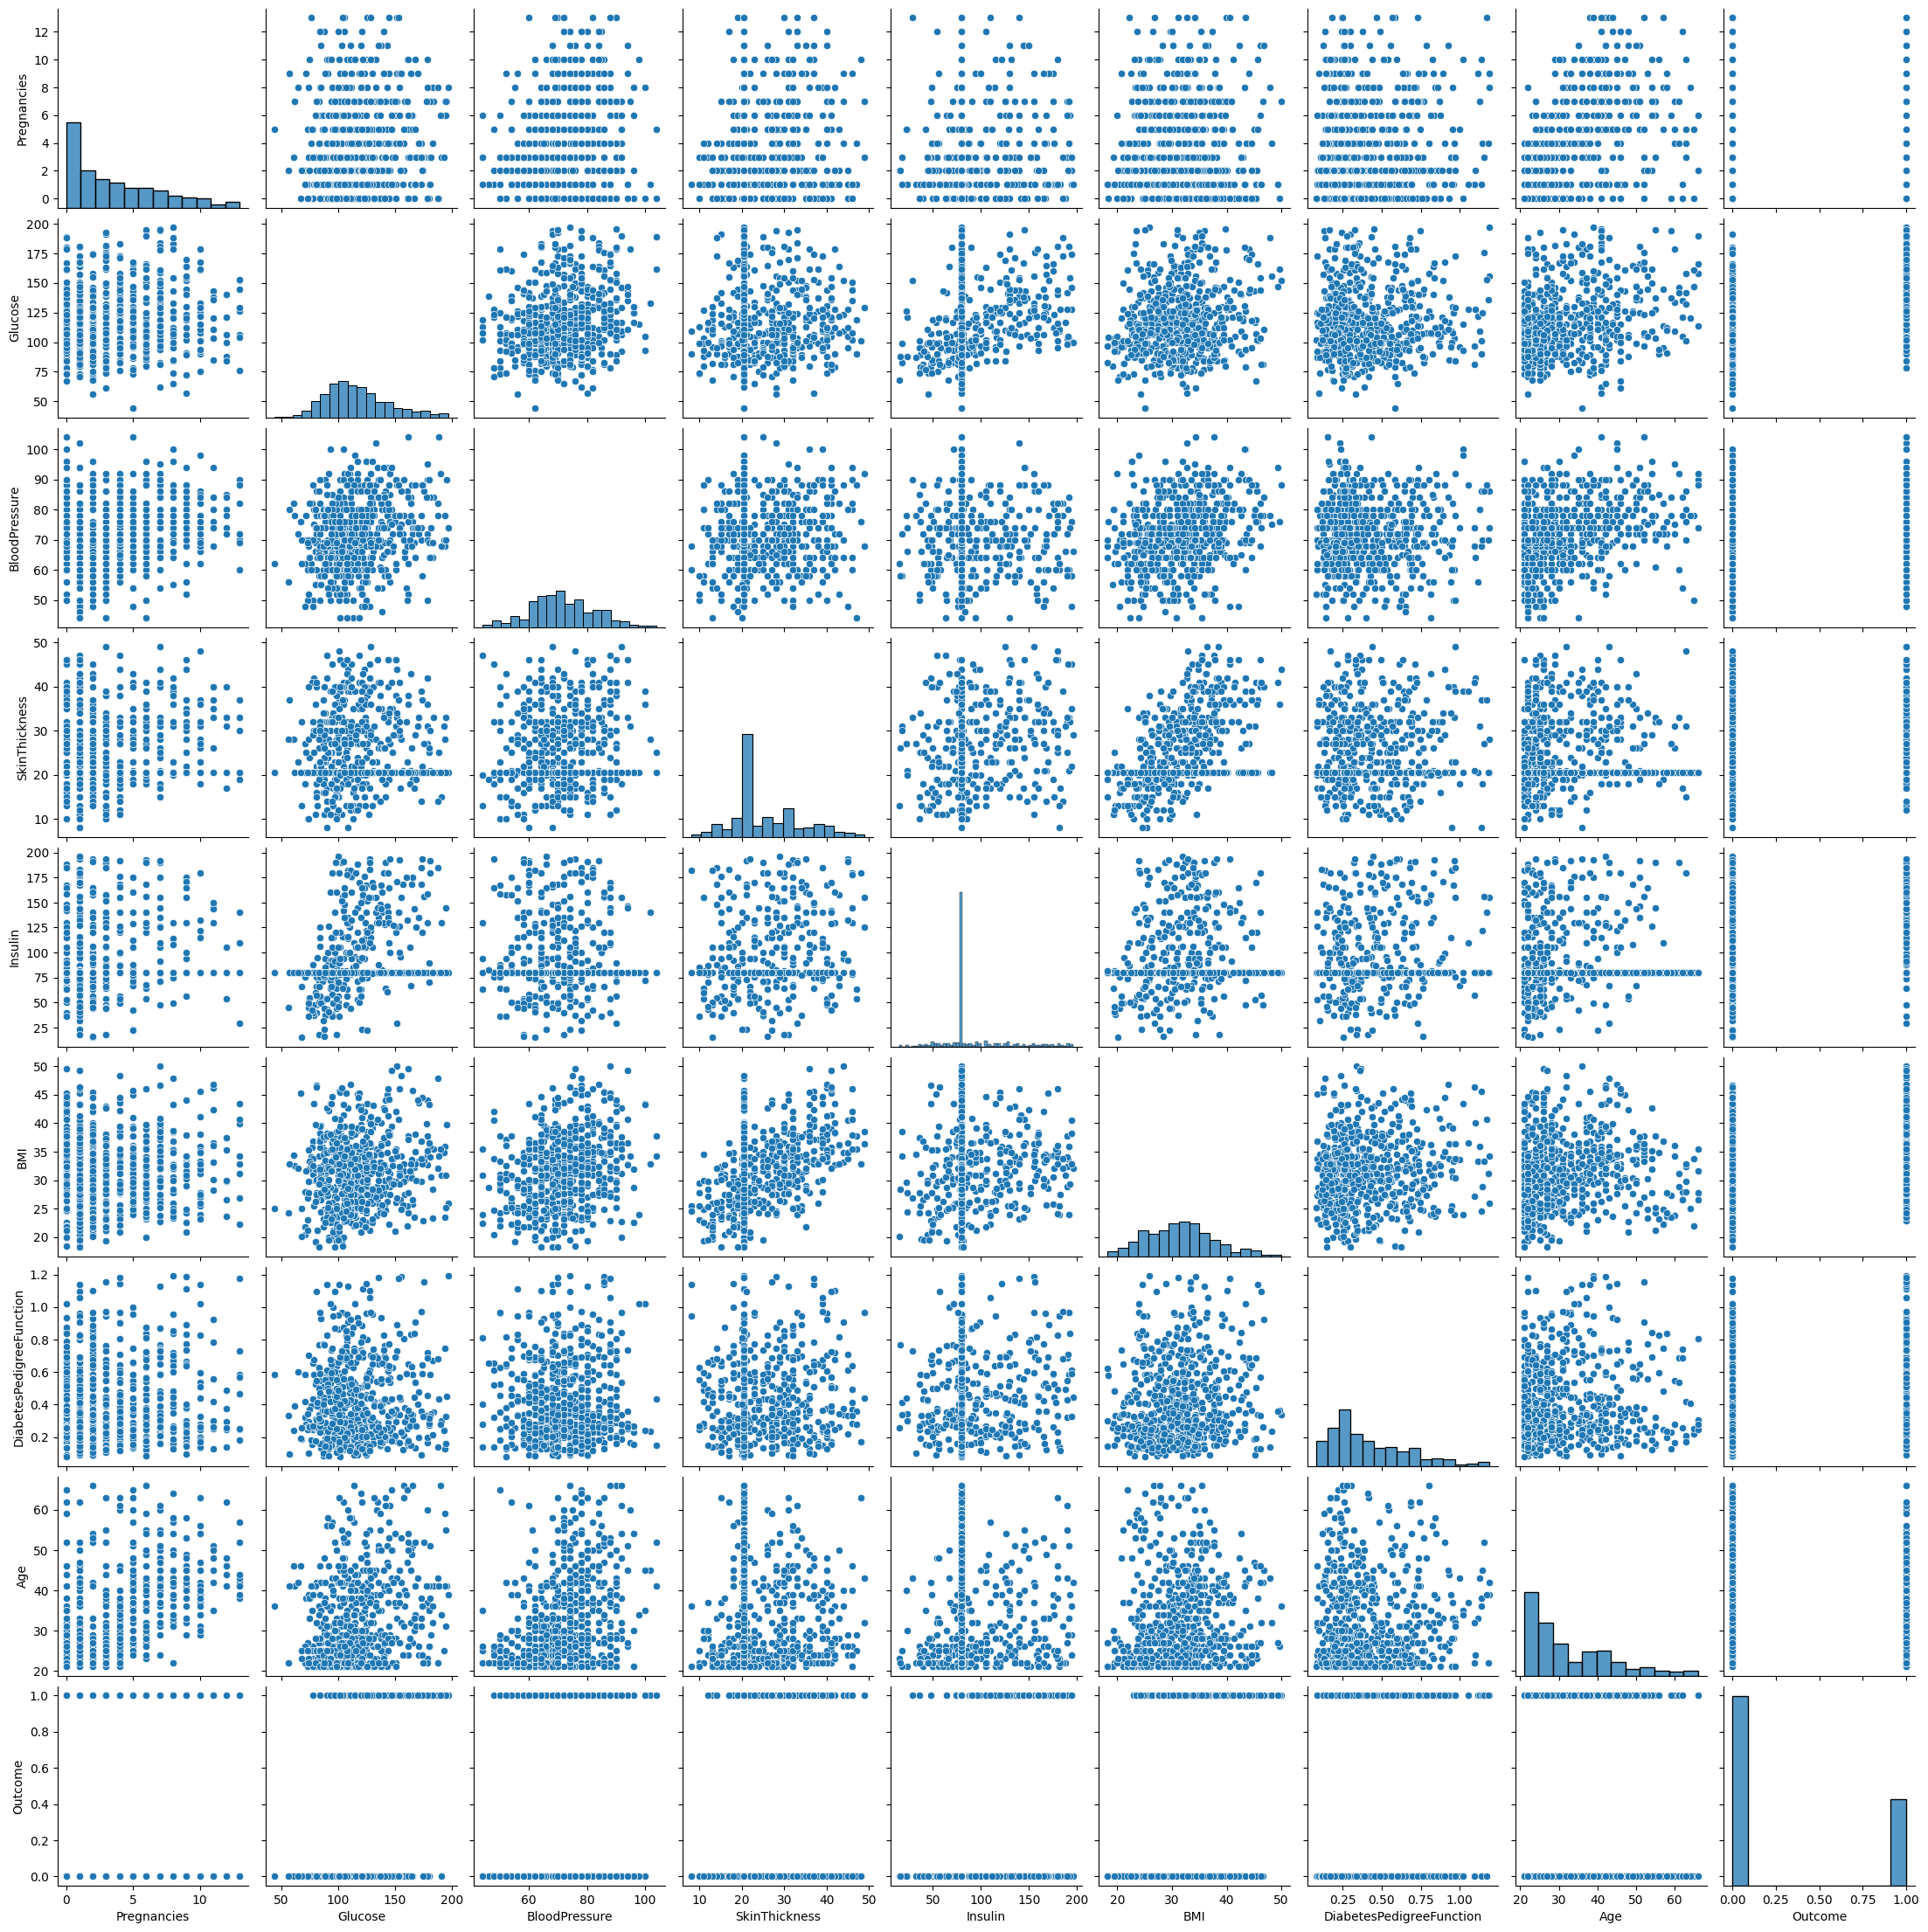

In [89]:
def plot_scatter_pairs(df):
    sns.pairplot(df)
    plt.show()
plot_scatter_pairs(df[:-1])


---




#**Methodology**

---



Based on the observations made, I would opt for a classification approach, specifically logistic regression, to train the dataset. This choice stems from the necessity of predicting a binary outcome—whether a patient will have diabetes or not.